# Exploration

In [51]:
# Vectorization and tables
import numpy as np
import pandas as pd

import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# .py file
import wrangle as w

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
wrangled_df = w.wrangle_github_repositories()
wrangled_df.shape

(500, 4)

In [ ]:
wrangled_df.head()

,repo,language,readme_contents,cleaned_readme_contents
0,huggingface/transformers,Python,<!---\nCopyright 2020 The HuggingFace Team. Al...,copyright 2020 huggingface team right reserved...
1,apachecn/ailearning,Python,"<p align=""center"">\n <a href=""https://www.a...",p aligncenter hrefhttpswwwapachecnorg img widt...
2,google-research/bert,Python,"# BERT\n\n**\*\*\*\*\* New March 11th, 2020: S...",bert new march 11th 2020 smaller bert model re...
3,hankcs/HanLP,Python,"<h2 align=""center"">HanLP: Han Language Process...",h2 aligncenterhanlp han language processingh2 ...
4,explosion/spaCy,Python,"<a href=""https://explosion.ai""><img src=""https...",hrefhttpsexplosionaiimg srchttpsexplosionaiass...


In [91]:
df = wrangled_df.copy()

# 1. Is there unique terminology used for Python and HTML?

In [92]:
# Filter the data frame for Python and HTML repositories
python_df = df[df['language'] == 'Python']
html_df = df[df['language'] == 'HTML']

In [93]:
python_df.head()

,repo,language,readme_contents,cleaned_readme_contents
0,huggingface/transformers,Python,<!---\nCopyright 2020 The HuggingFace Team. Al...,copyright 2020 huggingface team right reserved...
1,apachecn/ailearning,Python,"<p align=""center"">\n <a href=""https://www.a...",p aligncenter hrefhttpswwwapachecnorg img widt...
2,google-research/bert,Python,"# BERT\n\n**\*\*\*\*\* New March 11th, 2020: S...",bert new march 11th 2020 smaller bert model re...
3,hankcs/HanLP,Python,"<h2 align=""center"">HanLP: Han Language Process...",h2 aligncenterhanlp han language processingh2 ...
4,explosion/spaCy,Python,"<a href=""https://explosion.ai""><img src=""https...",hrefhttpsexplosionaiimg srchttpsexplosionaiass...


In [94]:
html_df.head()

,repo,language,readme_contents,cleaned_readme_contents
300,datawhalechina/daily-interview,HTML,# Daily Interview\n\n## 背景\n\n牛客网，知乎等众多网站上包含了数...,daily interview div aligncenter img srchttpstv...
301,didi/ChineseNLP,HTML,"# Chinese NLP\n\nShared tasks, datasets and st...",chinese nlp shared task datasets stateoftheart...
302,Unstructured-IO/unstructured,HTML,"<h3 align=""center"">\n <img\n src=""https://...",h3 aligncenter img srchttpsrawgithubuserconten...
303,chizhu/KGQA_HLM,HTML,# KGQA_HLM\n基于知识图谱的《红楼梦》人物关系可视化及问答系统\n\n[![Pro...,kgqa_hlm projecthttpsimgshieldsiobadgeprojectk...
304,totalgood/nlpia,HTML,[![Build Status](https://api.travis-ci.com/tot...,build statushttpsapitraviscicomtotalgoodnlpias...


In [112]:
# Combine Python README texts into a single string
python_text = ' '.join(python_df['cleaned_readme_contents'])

In [113]:
# Preprocess Python text
python_text = python_text.lower()  # Lowercase the text
python_tokens = word_tokenize(python_text)  # Tokenize the text

# Create a word frequency distribution for Python
python_freqdist = FreqDist(python_tokens)

In [97]:
html_df

,repo,language,readme_contents,cleaned_readme_contents
300,datawhalechina/daily-interview,HTML,# Daily Interview\n\n## 背景\n\n牛客网，知乎等众多网站上包含了数...,daily interview div aligncenter img srchttpstv...
301,didi/ChineseNLP,HTML,"# Chinese NLP\n\nShared tasks, datasets and st...",chinese nlp shared task datasets stateoftheart...
302,Unstructured-IO/unstructured,HTML,"<h3 align=""center"">\n <img\n src=""https://...",h3 aligncenter img srchttpsrawgithubuserconten...
303,chizhu/KGQA_HLM,HTML,# KGQA_HLM\n基于知识图谱的《红楼梦》人物关系可视化及问答系统\n\n[![Pro...,kgqa_hlm projecthttpsimgshieldsiobadgeprojectk...
304,totalgood/nlpia,HTML,[![Build Status](https://api.travis-ci.com/tot...,build statushttpsapitraviscicomtotalgoodnlpias...
...,...,...,...,...
495,salehmontazeran/nlp-project,HTML,# nlp-project\nnlp-project for NLP course\n\nf...,nlpproject nlpproject nlp course fatwowtxt ref...
496,dasdristanta13/NLP_work,HTML,# NLP_work\nI will upload all of my NLP relate...,nlp_work upload nlp related project topic mode...
497,kelseymour/Chinese-NLP_Buddhist-Texts,HTML,[![Binder](https://mybinder.org/badge_logo.svg...,binderhttpsmybinderorgbadge_logosvghttpsmybind...
498,Azeemaj101/NLP_ChatBot,HTML,# NLP_ChatBot\n![image](https://user-images.gi...,nlp_chatbot imagehttpsuserimagesgithubusercont...


In [98]:
html_df['cleaner_readme_contents'] = html_df['cleaned_readme_contents'].astype(str)

In [114]:
# Combine HTML README texts into a single string
html_text = ' '.join(html_df['cleaner_readme_contents'])

In [115]:
# Preprocess HTML text
html_text = html_text.lower()  # Lowercase the text
html_tokens = word_tokenize(html_text)  # Tokenize the text

# Create a word frequency distribution for HTML
html_freqdist = FreqDist(html_tokens)

In [116]:
# Identify unique words for Python and HTML
unique_python_words = set(python_freqdist.keys()) - set(html_freqdist.keys())
unique_html_words = set(html_freqdist.keys()) - set(python_freqdist.keys()) 

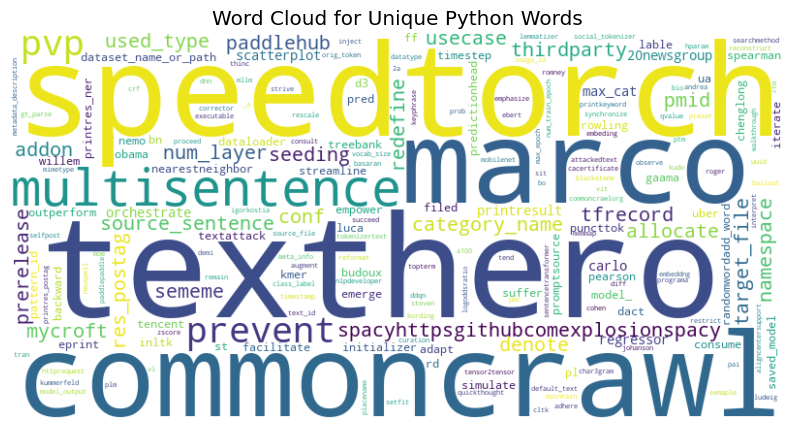

In [117]:
# Convert the set of unique Python words into a single string
text = ' '.join(unique_python_words)

# Create a WordCloud object with desired settings
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Unique Python Words')
plt.show()

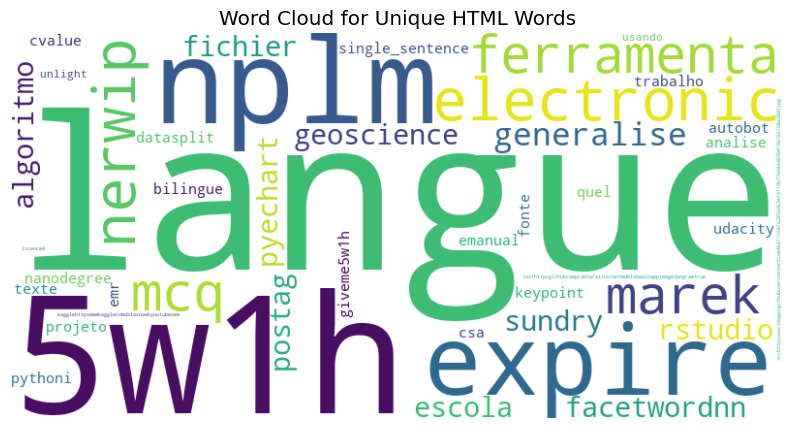

In [118]:
# Convert the set of unique Python words into a single string
text = ' '.join(unique_html_words)

# Create a WordCloud object with desired settings
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Unique HTML Words')
plt.show()

In [119]:
# Assuming you have the word frequencies for Python and HTML: python_freqdist, html_freqdist

# Create a list of tuples containing unique words and their frequencies for Python
python_word_freq = [(word, freq) for word, freq in python_freqdist.items() if word not in html_freqdist.keys()]

# Sort the list of tuples by frequency in descending order for Python
sorted_python_word_freq = sorted(python_word_freq, key=lambda x: x[1], reverse=True)

# Extract the top 10 unique words and their frequencies for Python
top_10_python_words = [pair[0] for pair in sorted_python_word_freq][:10]
top_10_python_frequencies = [pair[1] for pair in sorted_python_word_freq][:10]

# Create a list of tuples containing unique words and their frequencies for HTML
html_word_freq = [(word, freq) for word, freq in html_freqdist.items() if word not in python_freqdist.keys()]

# Sort the list of tuples by frequency in descending order for HTML
sorted_html_word_freq = sorted(html_word_freq, key=lambda x: x[1], reverse=True)

# Extract the top 10 unique words and their frequencies for HTML
top_10_html_words = [pair[0] for pair in sorted_html_word_freq][:10]
top_10_html_frequencies = [pair[1] for pair in sorted_html_word_freq][:10]

# Create a dataframe for the top 10 unique words and frequencies
data = {
    'Python Word': top_10_python_words,
    'Python Frequency': top_10_python_frequencies,
    'HTML Word': top_10_html_words,
    'HTML Frequency': top_10_html_frequencies
}
df = pd.DataFrame(data)

# Display the dataframe
print(df)


  Python Word  Python Frequency       HTML Word  HTML Frequency
0          td               456          python             344
1      config               176         python3              37
2        wang               163            exam              23
3   tokenizer               152           nlpia              22
4       size2               147             ref              21
5        html                97  contextreplace              20
6         llm                75        proposal              18
7          wu                74      giveme5w1h              17
8        1000                70        througe1              17
9          yu                68          in_dir              16


In [120]:
# Filter the repositories that contain the string "srchttps" in the README text
matched_repos = python_df[python_df['cleaned_readme_contents'].str.contains("tdimg")]

# Count the frequency of "srchttps" in each repository
matched_repos['frequency'] = matched_repos['cleaned_readme_contents'].str.count("tdimg")

# Sort the matched repositories by frequency in descending order
sorted_repos = matched_repos.sort_values('frequency', ascending=False)

# Extract the repository name and frequency
repo_freq_list = sorted_repos[['repo', 'frequency']].values.tolist()

# Display the list of repositories and their frequencies
for repo, freq in repo_freq_list:
    print(f"Repository: {repo}, Frequency: {freq}")

Repository: PaddlePaddle/PaddleHub, Frequency: 3


In [121]:
# Filter the repositories that contain the string "srchttps" in the README text
matched_repos = python_df[python_df['cleaned_readme_contents'].str.contains("srchttps")]

# Count the frequency of "srchttps" in each repository
matched_repos['frequency'] = matched_repos['cleaned_readme_contents'].str.count("srchttps")

# Sort the matched repositories by frequency in descending order
sorted_repos = matched_repos.sort_values('frequency', ascending=False)

# Extract the repository name and frequency
repo_freq_list = sorted_repos[['repo', 'frequency']].values.tolist()

# Display the list of repositories and their frequencies
for repo, freq in repo_freq_list:
    print(f"Repository: {repo}, Frequency: {freq}")

Repository: mindsdb/mindsdb, Frequency: 63
Repository: PaddlePaddle/PaddleHub, Frequency: 55
Repository: obsei/obsei, Frequency: 47
Repository: code-kern-ai/refinery, Frequency: 24
Repository: DragonComputer/Dragonfire, Frequency: 21
Repository: koursaros-ai/nboost, Frequency: 20
Repository: PaddlePaddle/PaddleNLP, Frequency: 18
Repository: MorvanZhou/NLP-Tutorials, Frequency: 17
Repository: argilla-io/argilla, Frequency: 17
Repository: neuralmagic/sparseml, Frequency: 14
Repository: neuralmagic/deepsparse, Frequency: 13
Repository: beir-cellar/beir, Frequency: 13
Repository: gnes-ai/gnes, Frequency: 12
Repository: deepset-ai/haystack, Frequency: 12
Repository: chatopera/Synonyms, Frequency: 12
Repository: huggingface/transformers, Frequency: 11
Repository: HUANGZHIHAO1994/weibo-analysis-and-visualization, Frequency: 10
Repository: songyouwei/ABSA-PyTorch, Frequency: 10
Repository: undertheseanlp/underthesea, Frequency: 10
Repository: promptslab/Promptify, Frequency: 10
Repository: jbe

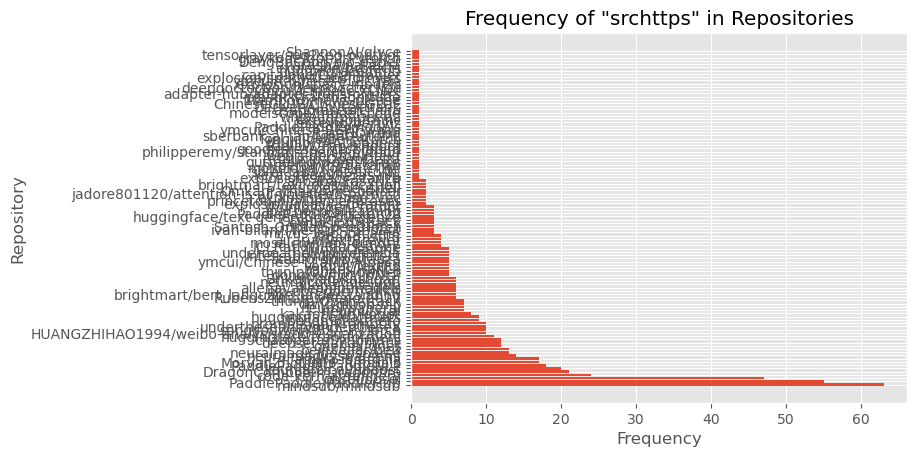

In [122]:
# Assuming you have a DataFrame named 'repos_df' that contains repository information

# Filter the repositories that contain the string "srchttps" in the README text
matched_repos = python_df[python_df['cleaned_readme_contents'].str.contains("srchttps")]

# Count the frequency of "srchttps" in each repository
matched_repos['frequency'] = matched_repos['cleaned_readme_contents'].str.count("srchttps")

# Sort the matched repositories by frequency in descending order
sorted_repos = matched_repos.sort_values('frequency', ascending=False)

# Extract the repository name and frequency
repo_freq_list = sorted_repos[['repo', 'frequency']].values.tolist()

# Extract the repository names and frequencies as separate lists
repos = [repo for repo, freq in repo_freq_list]
frequencies = [freq for repo, freq in repo_freq_list]

# Create a horizontal bar chart
plt.barh(repos, frequencies)

# Set the axis labels and title
plt.xlabel('Frequency')
plt.ylabel('Repository')
plt.title('Frequency of "srchttps" in Repositories')

# Show the plot
plt.show()


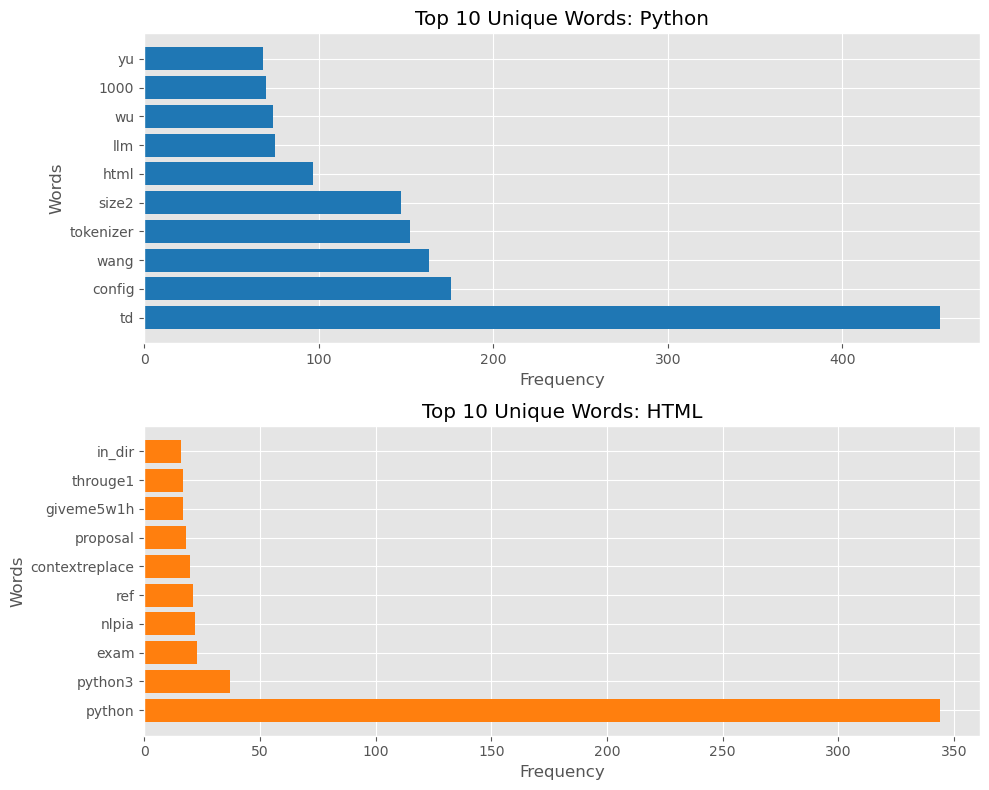

In [123]:
# Assuming you have the dataframe: df

# Sort the dataframe by frequency in descending order for Python
df_python_sorted = df.sort_values(by='Python Frequency', ascending=False)

# Sort the dataframe by frequency in descending order for HTML
df_html_sorted = df.sort_values(by='HTML Frequency', ascending=False)

# Set the plot style
plt.style.use('ggplot')

# Create subplots for Python and HTML
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Plot the horizontal bar chart for Python
axes[0].barh(df_python_sorted['Python Word'], df_python_sorted['Python Frequency'], color='tab:blue')
axes[0].set_title('Top 10 Unique Words: Python')
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Words')

# Plot the horizontal bar chart for HTML
axes[1].barh(df_html_sorted['HTML Word'], df_html_sorted['HTML Frequency'], color='tab:orange')
axes[1].set_title('Top 10 Unique Words: HTML')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Words')

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()


Moving forward, removing repo `pemistahl/lingua-py`

In [110]:
# Filter out the specific repository from the Python dataframe
python_df = python_df[python_df['repo'] != 'pemistahl/lingua-py']

# Filter out the specific repository from the HTML dataframe
html_df = html_df[html_df['repo'] != 'pemistahl/lingua-py']

Rerun everything

In [111]:
python_df.info(), html_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 299
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   repo                     299 non-null    object
 1   language                 299 non-null    object
 2   readme_contents          299 non-null    object
 3   cleaned_readme_contents  299 non-null    object
dtypes: object(4)
memory usage: 11.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 300 to 499
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   repo                     200 non-null    object
 1   language                 200 non-null    object
 2   readme_contents          193 non-null    object
 3   cleaned_readme_contents  193 non-null    object
 4   cleaner_readme_contents  200 non-null    object
dtypes: object(5)
memory usage: 9.4+ KB


(None, None)

In [126]:
# Filter the repositories that contain the string "srchttps" in the README text
matched_repos = python_df[python_df['cleaned_readme_contents'].str.contains("td")]

# Count the frequency of "srchttps" in each repository
matched_repos['frequency'] = matched_repos['cleaned_readme_contents'].str.count("td")

# Sort the matched repositories by frequency in descending order
sorted_repos = matched_repos.sort_values('frequency', ascending=False)

# Extract the repository name and frequency
repo_freq_list = sorted_repos[['repo', 'frequency']].values.tolist()

# Display the list of repositories and their frequencies
for repo, freq in repo_freq_list:
    print(f"Repository: {repo}, Frequency: {freq}")

Repository: OFA-Sys/Chinese-CLIP, Frequency: 536
Repository: hankcs/HanLP, Frequency: 292
Repository: QData/TextAttack, Frequency: 234
Repository: milvus-io/bootcamp, Frequency: 138
Repository: obsei/obsei, Frequency: 135
Repository: gnes-ai/gnes, Frequency: 105
Repository: allenai/allennlp, Frequency: 72
Repository: AnubhavGupta3377/Text-Classification-Models-Pytorch, Frequency: 70
Repository: zjunlp/DeepKE, Frequency: 59
Repository: timoschick/pet, Frequency: 54
Repository: grammarly/gector, Frequency: 48
Repository: beir-cellar/beir, Frequency: 41
Repository: argilla-io/argilla, Frequency: 37
Repository: jina-ai/examples, Frequency: 36
Repository: namisan/mt-dnn, Frequency: 31
Repository: code-kern-ai/refinery, Frequency: 29
Repository: PaddlePaddle/PaddleHub, Frequency: 26
Repository: songyouwei/ABSA-PyTorch, Frequency: 25
Repository: lonePatient/awesome-pretrained-chinese-nlp-models, Frequency: 18
Repository: JasonKessler/scattertext, Frequency: 16
Repository: lukalabs/cakechat, F

In [124]:
# Filter the repositories that contain the string "srchttps" in the README text
matched_repos = html_df[html_df['cleaner_readme_contents'].str.contains("python")]

# Count the frequency of "srchttps" in each repository
matched_repos['frequency'] = matched_repos['cleaner_readme_contents'].str.count("python")

# Sort the matched repositories by frequency in descending order
sorted_repos = matched_repos.sort_values('frequency', ascending=False)

# Extract the repository name and frequency
repo_freq_list = sorted_repos[['repo', 'frequency']].values.tolist()

# Display the list of repositories and their frequencies
for repo, freq in repo_freq_list:
    print(f"Repository: {repo}, Frequency: {freq}")

Repository: EvanLi/programming-book-3, Frequency: 155
Repository: AliMorty/Text_Summerization, Frequency: 68
Repository: totalgood/nlpia, Frequency: 22
Repository: dzieciou/pystempel, Frequency: 22
Repository: Unstructured-IO/unstructured, Frequency: 21
Repository: thejeswi/BobGoesToJail, Frequency: 17
Repository: plandes/deepnlp, Frequency: 17
Repository: rjjfox/disaster-response-classification, Frequency: 14
Repository: detsutut/ama-bot, Frequency: 12
Repository: lihanghang/TecRoom, Frequency: 11
Repository: Dibyakanti/AutoTNLI-code, Frequency: 11
Repository: aasouzaconsult/Cientista-de-Dados, Frequency: 11
Repository: 1475963/sentence-boundary-detection, Frequency: 11
Repository: xiamx/fastText, Frequency: 10
Repository: kevinlu1248/pyate, Frequency: 10
Repository: fhamborg/Giveme5W1H, Frequency: 10
Repository: ansegura7/NLP, Frequency: 9
Repository: ceshine/textrank_demo, Frequency: 9
Repository: TigerGraph-DevLabs/RASA, Frequency: 8
Repository: Rostlab/LocText, Frequency: 7
Reposi

# 2. To analyze two-word combinations (bigrams) that are used more in Python than HTML and vice versa

In [127]:
# Tokenize the README texts into bigrams for Python and HTML
python_bigrams = list(nltk.bigrams(nltk.word_tokenize(python_text)))
html_bigrams = list(nltk.bigrams(nltk.word_tokenize(html_text)))

In [128]:
# Calculate the frequencies of bigrams for Python and HTML
python_bigram_freqdist = FreqDist(python_bigrams)
html_bigram_freqdist = FreqDist(html_bigrams)


In [129]:
# Identify bigrams that occur more frequently in Python than HTML
python_unique_bigrams = set(python_bigram_freqdist.keys()) - set(html_bigram_freqdist.keys())

# Identify bigrams that occur more frequently in HTML than Python
html_unique_bigrams = set(html_bigram_freqdist.keys()) - set(python_bigram_freqdist.keys())

In [130]:
# Sort the unique bigrams by frequency for Python and HTML
sorted_python_bigrams = sorted(python_unique_bigrams, key=lambda x: python_bigram_freqdist[x], reverse=True)
sorted_html_bigrams = sorted(html_unique_bigrams, key=lambda x: html_bigram_freqdist[x], reverse=True)

In [133]:
# Display the top 10 bigrams that occur more frequently in Python than HTML
print("Top 10 Bigrams occurring more frequently in Python:")
for bigram in sorted_python_bigrams[:10]:
    print(bigram)

# Display the top 10 bigrams that occur more frequently in HTML than Python
print("\nTop 10 Bigrams occurring more frequently in HTML:")
for bigram in sorted_html_bigrams[:10]:
    print(bigram)

Top 10 Bigrams occurring more frequently in Python:
('released', 'paper')
('font', 'size2')
('x', 'x')
('td', 'td')
('td', 'tr')
('al', 'arxiv')
('adversarial', 'attack')
('tr', 'td')
('tensorflow', 'pytorch')
('topic', 'model')

Top 10 Bigrams occurring more frequently in HTML:
('python', 'def')
('context', 'contextreplace')
('ref', 'summary')
('ner', 'tool')
('contextreplace', 'context')
('target_blank', 'relnoreferrer')
('run', 'python')
('noopener', 'img')
('relnoreferrer', 'noopener')
('stemming', 'table')


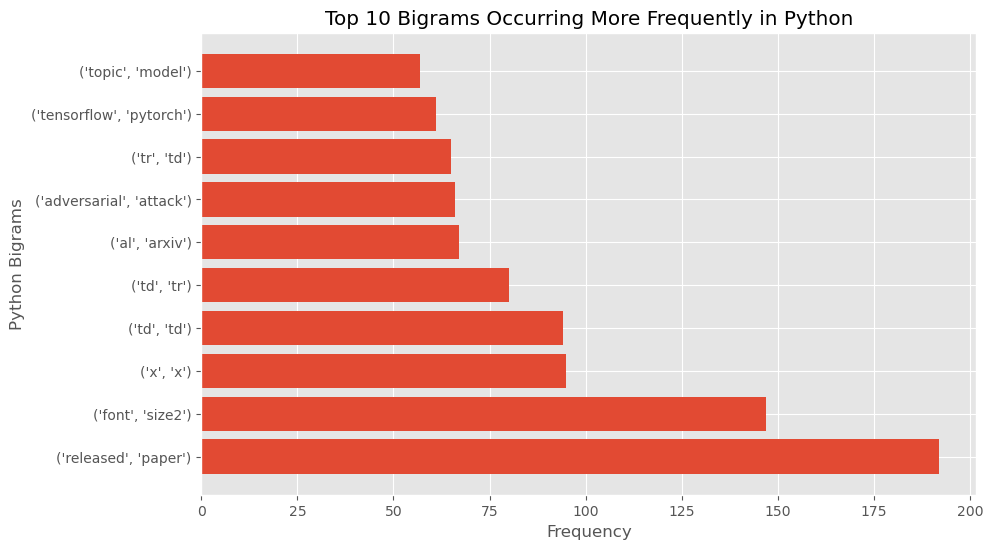

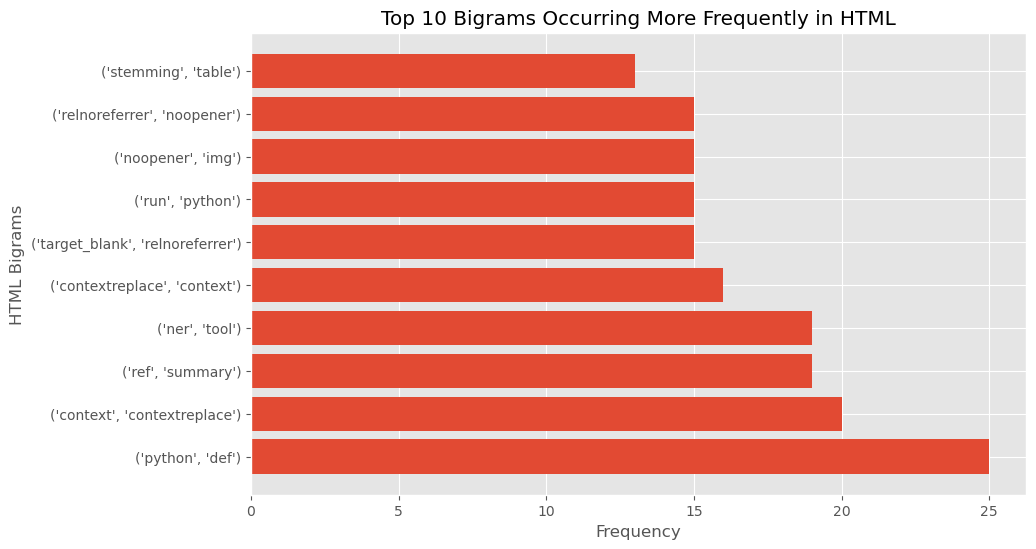

In [132]:
# Get the top 10 bigrams occurring more frequently in Python
top_10_python_bigrams = sorted_python_bigrams[:10]
python_bigram_frequencies = [python_bigram_freqdist[bigram] for bigram in top_10_python_bigrams]

# Get the top 10 bigrams occurring more frequently in HTML
top_10_html_bigrams = sorted_html_bigrams[:10]
html_bigram_frequencies = [html_bigram_freqdist[bigram] for bigram in top_10_html_bigrams]

# Plot the bar chart for Python bigrams
plt.figure(figsize=(10, 6))
plt.barh(range(10), python_bigram_frequencies, align='center')
plt.yticks(range(10), top_10_python_bigrams)
plt.xlabel('Frequency')
plt.ylabel('Python Bigrams')
plt.title('Top 10 Bigrams Occurring More Frequently in Python')
plt.show()

# Plot the bar chart for HTML bigrams
plt.figure(figsize=(10, 6))
plt.barh(range(10), html_bigram_frequencies, align='center')
plt.yticks(range(10), top_10_html_bigrams)
plt.xlabel('Frequency')
plt.ylabel('HTML Bigrams')
plt.title('Top 10 Bigrams Occurring More Frequently in HTML')
plt.show()


# 3. Three-word combinations used more in Python than HTML and vice versa

In [ ]:
# Tokenize the README texts into trigrams for Python and HTML
python_trigrams = list(nltk.trigrams(nltk.word_tokenize(python_text)))
html_trigrams = list(nltk.trigrams(nltk.word_tokenize(html_text)))

# Calculate the frequencies of trigrams for Python and HTML
python_trigram_freqdist = FreqDist(python_trigrams)
html_trigram_freqdist = FreqDist(html_trigrams)

# Identify trigrams that occur more frequently in Python than HTML
python_unique_trigrams = set(python_trigram_freqdist.keys()) - set(html_trigram_freqdist.keys())

# Identify trigrams that occur more frequently in HTML than Python
html_unique_trigrams = set(html_trigram_freqdist.keys()) - set(python_trigram_freqdist.keys())

# Sort the unique trigrams by frequency for Python and HTML
sorted_python_trigrams = sorted(python_unique_trigrams, key=lambda x: python_trigram_freqdist[x], reverse=True)
sorted_html_trigrams = sorted(html_unique_trigrams, key=lambda x: html_trigram_freqdist[x], reverse=True)

# Display the top 10 trigrams that occur more frequently in Python than HTML
print("Top 10 Trigrams occurring more frequently in Python:")
for trigram in sorted_python_trigrams[:10]:
    print(trigram)

# Display the top 10 trigrams that occur more frequently in HTML than Python
print("\nTop 10 Trigrams occurring more frequently in HTML:")
for trigram in sorted_html_trigrams[:10]:
    print(trigram)


In [ ]:
# Get the top 10 trigrams occurring more frequently in Python
top_10_python_trigrams = sorted_python_trigrams[:10]
python_trigram_frequencies = [python_trigram_freqdist[trigram] for trigram in top_10_python_trigrams]

# Get the top 10 trigrams occurring more frequently in HTML
top_10_html_trigrams = sorted_html_trigrams[:10]
html_trigram_frequencies = [html_trigram_freqdist[trigram] for trigram in top_10_html_trigrams]

# Plot the bar chart for Python trigrams
plt.figure(figsize=(10, 6))
plt.barh(range(10), python_trigram_frequencies, align='center')
plt.yticks(range(10), top_10_python_trigrams)
plt.xlabel('Frequency')
plt.ylabel('Python Trigrams')
plt.title('Top 10 Trigrams Occurring More Frequently in Python')
plt.show()

# Plot the bar chart for HTML trigrams
plt.figure(figsize=(10, 6))
plt.barh(range(10), html_trigram_frequencies, align='center')
plt.yticks(range(10), top_10_html_trigrams)
plt.xlabel('Frequency')
plt.ylabel('HTML Trigrams')
plt.title('Top 10 Trigrams Occurring More Frequently in HTML')
plt.show()
